## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
import pandas as pd
import numpy as np

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [2]:
pitching = pd.read_csv("pitching.csv")
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [3]:
pitching.isna().sum()

player_id        0
year             0
stint            0
team_id          0
league_id      131
w                0
l                0
g                0
gs               0
cg               0
sho              0
sv               0
ipouts           1
h                0
er               0
hr               0
bb               0
so               0
baopp         1525
era             90
ibb          14575
wp             133
hbp            559
bk               0
bfp            239
gf             133
r                0
sh           32900
sf           32900
g_idp        43394
dtype: int64

In [4]:
pitching = pitching.dropna(axis=1)
pitching.head()

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,bechtge01,1871,1,PH1,1,2,3,3,2,0,0,43,23,0,11,1,0,42
1,brainas01,1871,1,WS3,12,15,30,30,30,0,0,361,132,4,37,13,0,292
2,fergubo01,1871,1,NY2,0,0,1,0,0,0,0,8,3,0,0,0,0,9
3,fishech01,1871,1,RC1,4,16,24,24,22,1,0,295,103,3,31,15,0,257
4,fleetfr01,1871,1,NY2,0,1,1,1,1,0,0,20,10,0,3,0,0,21


1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

In [5]:
year = pitching.groupby(pitching['year']).size()
year

year
1871     19
1872     23
1873     25
1874     17
1875     47
       ... 
2011    707
2012    722
2013    726
2014    746
2015    809
Length: 145, dtype: int64

In [6]:
import matplotlib.pyplot as plt

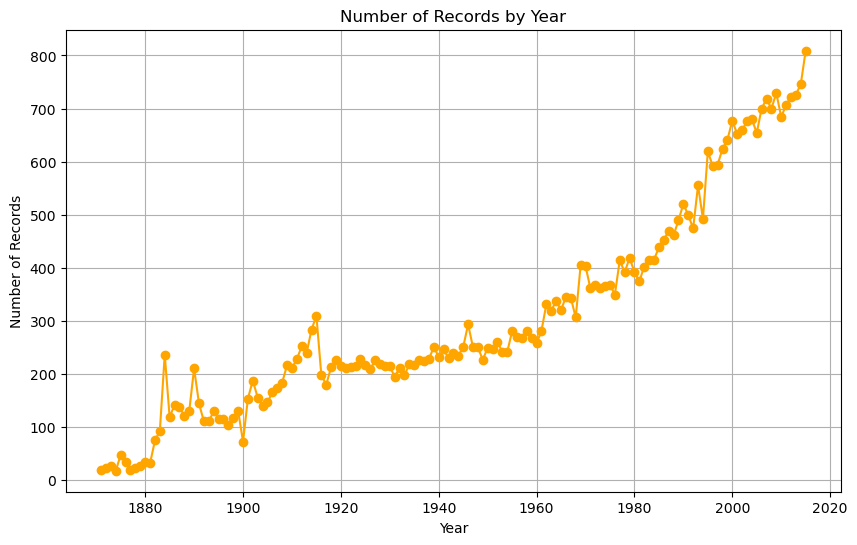

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Number of Records by Year')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.plot(year.index, year.values, marker='o', color='orange')
plt.grid(True)
plt.show()

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [8]:
pitching = pitching[pitching['year'] >= 1980]
len(pitching)

21157

In [9]:
pitching

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.6 reset_index()를 통해 재배열하세요.

In [10]:
pitching.reset_index(drop=True, inplace=True)
pitching

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [11]:
pitching['w'].value_counts()

w
0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [12]:
pitching = pitching[pitching['w'] != 0]
len(pitching)

15303

1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [13]:
pitching['w'] = (pitching['w'] >= 10).astype(int)
pitching

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_49968/1956097475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching['w'] = (pitching['w'] >= 10).astype(int)


,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,aasedo01,1980,1,CAL,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,abbotgl01,1980,1,SEA,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,alexado01,1980,1,ATL,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,allenne01,1980,1,NYN,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,andujjo01,1980,1,HOU,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,wrighmi01,2015,1,BAL,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,wrighst01,2015,1,BOS,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,yateski01,2015,1,TBA,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,youngch03,2015,1,KCA,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [14]:
pitching['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [15]:
pitching.drop(['player_id', 'year', 'team_id'], axis=1, inplace=True)

/var/folders/c6/kvlszyfj2q9_tv_8pb0y40qm0000gn/T/ipykernel_49968/2360947009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitching.drop(['player_id', 'year', 'team_id'], axis=1, inplace=True)


1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [16]:
X = pitching.loc[:, pitching.columns != 'w'] #features
y = pitching['w'] #target

In [17]:
#conda install -c conda-forge imbalanced-learn

In [18]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=123)

X_smote, y_smote = smote.fit_resample(X, y)

print('SMOTE 적용 전 피처/레이블 데이터셋: ', X.shape, y.shape)
print('SMOTE 적용 후 피처/레이블 데이터셋: ', X_smote.shape, y_smote.shape)

SMOTE 적용 전 피처/레이블 데이터셋:  (15303, 14) (15303,)
SMOTE 적용 후 피처/레이블 데이터셋:  (25178, 14) (25178,)


1.13 balance가 잘 맞춰졌는지 확인하세요.

In [19]:
y_smote.value_counts()

w
0    12589
1    12589
Name: count, dtype: int64

In [20]:
X_smote

,stint,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,1,13,40,21,5,1,2,193,79,13,66,74,1,83
1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,1,11,35,35,7,1,0,227,108,20,74,114,0,120
3,1,10,59,0,0,0,22,87,40,7,40,79,1,43
4,1,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25173,1,14,34,34,3,0,0,267,131,24,86,139,0,142
25174,1,7,32,32,1,0,0,210,88,21,69,105,0,100
25175,1,7,29,29,4,1,0,172,68,16,52,129,1,72
25176,1,5,71,0,0,0,6,90,35,6,43,97,2,43


1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

- SMOTE 동작 방식: 소수 데이터 중 특정 샘플을 기준으로 해당 데이터와 가장 가까운 k개의 이웃 데이터를 찾는다. 그리고 선별된 데이터들과 처음 기준이 된 데이터와의 연결선 상에 새로운 데이터를 만든다. 이 과정을 반복해 데이터 수를 늘린다.
- 오버샘플링은 정보 손실이 없고 언더 샘플링에 비해 분류 정확도가 높지만, 오버피팅 가능성이 존재하고 노이즈에 민감하다. 

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

- Resampling: 소수 범주의 데이터 수를 다수 범주의 데이터 수와 비슷해지도록 증가시키는 방법
- Borderline SMOTE: Borderline 부분에 대해서만 SMOTE 방식을 사용하는 것
- GAN: 생성자는 가짜 샘플을 만들고 구분자는 샘플의 진위를 판별하며 진짜 샘플과 매우 유사한 가짜 샘플을 만들어내는 방법

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,
                                                   test_size=0.2,
                                                   stratify=y_smote, #target의 클래스 비율에 맞춰 분할
                                                   random_state=123)

In [24]:
# train set을 train, validation으로 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                 test_size=0.2,
                                                 stratify=y_train,
                                                 random_state=123)

In [25]:
print('Train set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (16113, 14) (16113,)
Validation set: (4029, 14) (4029,)
Test set: (5036, 14) (5036,)


2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

- test accuracy를 예측해볼 수 있고, 모델 튜닝을 통해 오버피팅을 방지할 수 있다.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from bayes_opt import BayesianOptimization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [27]:
# random forest 모델
model = RandomForestClassifier()

In [28]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [29]:
# randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_grid)

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200]})

In [30]:
# 최적 파라미터
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 30,
 'criterion': 'gini',
 'bootstrap': False}

In [31]:
# accuracy score
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9620730738681493


2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

- n_estimators: 트리의 수
- max_depth: 트리의 최대 깊이
- min_samples_split: 분할 할 수 있는 샘플 수를 지정
- min_samples_leaf: 분할해서 leaf가 될 수 있는 샘플 수를 지정
- bootstrap: 부트스트래핑은 중복을 허용하여 샘플을 랜덤 하게 선택하는 방식, 모델의 다양성을 증가
- criterion: 노드의 분할 기준을 결정하는 데 사용되는 평가 지표

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [32]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [39]:
# grid search
grid_search = GridSearchCV(model, param_grid=param_grid)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [40]:
# 최적 파라미터
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [41]:
# accuracy score
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9622716441620334


2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

-> Randomized SearchCV는 파라미터 범위 내에서 랜덤하게 조합하는 것을 반복하여 최적의 파라미터를 찾는다. 반면 GridSearchCV는 범위 전체에 대한 모든 조합을 다 살펴본다. 성능 개선 면에서는 그리드서치가 더 뛰어나지만, 모든 조합을 다 살펴보기 때문에 시간이 오래 걸린다.

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [34]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [42]:
params = {
    'n_estimators': (10, 200),
    'max_depth': (2, 30),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

def bayesian_rf(n_estimators, max_depth, min_samples_split, min_samples_leaf):
  
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
                    
    rf = RandomForestClassifier(n_estimators = n_estimators,
                                max_depth = max_depth,
                                min_samples_split = min_samples_split,
                                min_samples_leaf = min_samples_leaf,
                                bootstrap = False,
                                criterion = 'gini')
    
    scores = cross_val_score(rf, X_train, y_train, cv=3, scoring='accuracy')
    return np.round(np.mean(scores),4)

In [43]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=bayesian_rf, pbounds=params, random_state=123)

# 베이지안 최적화 수행
optimizer.maximize(init_points=5, n_iter=10)

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.953     | 21.5      | 1.858     | 3.815     | 114.7     |
| 2         | 0.9479    | 22.15     | 2.269     | 9.846     | 140.1     |
| 3         | 0.9502    | 15.47     | 2.176     | 4.745     | 148.5     |
| 4         | 0.9512    | 14.28     | 1.179     | 5.184     | 150.2     |
| 5         | 0.9325    | 7.11      | 1.526     | 6.252     | 111.0     |
| 6         | 0.9532    | 30.0      | 1.339     | 2.0       | 120.3     |
| 7         | 0.9517    | 30.0      | 2.181     | 2.0       | 106.1     |
| 8         | 0.9235    | 5.959     | 1.755     | 4.458     | 166.5     |
| 9         | 0.949     | 29.73     | 1.165     | 9.886     | 87.53     |
| 10        | 0.949     | 29.45     | 1.769     | 9.807     | 113.3     |
| 11        | 0.9526    | 29.01     | 1.128     | 2.371     | 68.87     |
| 12        | 0.9481    | 16.3      | 

In [44]:
# 최적 파라미터
best_param = optimizer.max['params']
best_param

{'max_depth': 30.0,
 'min_samples_leaf': 1.338533745874231,
 'min_samples_split': 2.0,
 'n_estimators': 120.25257802318565}

In [45]:
# accuracy score
print('Accuracy:', optimizer.max['target'])

Accuracy: 0.9532


2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [46]:
# 최적 파라미터
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [47]:
rf_model = RandomForestClassifier(max_depth = 30,
                                  min_samples_leaf = 1,
                                  min_samples_split = 2,
                                  n_estimators = 200,
                                  bootstrap = False,
                                  criterion = 'gini')

rf_model.fit(X_train, y_train)

pred = rf_model.predict(X_test)
print('Accuracy:', accuracy_score(pred, y_test))

Accuracy: 0.9632644956314536


### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.

In [49]:
# 데이터셋 나누기 (validation 데이터를 따로 나누지 않음)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_smote, y_smote,
                                                   test_size=0.2,
                                                   stratify=y_smote,
                                                   random_state=123)

In [50]:
# 앞서 나온 최적 파라미터를 참고해 범위를 변경

#'bootstrap': False
#'criterion': 'gini'
#'max_depth': 30
#'min_samples_leaf': 1
#'min_samples_split': 2
#'n_estimators': 200

param_grid = {
    'n_estimators' : (150, 500),
    'max_depth': (20, 50),
    'min_samples_split': (2, 5),
    'min_samples_leaf': (1, 4),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [51]:
# random forest 모델
model = RandomForestClassifier()

In [52]:
# randomized search (그리드서치가 성능이 더 좋았지만 시간이 너무 오래 걸림..)
random_search = RandomizedSearchCV(model, param_distributions=param_grid)

random_search.fit(X_train2, y_train2)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': (20, 50),
                                        'min_samples_leaf': (1, 4),
                                        'min_samples_split': (2, 5),
                                        'n_estimators': (150, 500)})

In [54]:
# 새로운 최적 파라미터
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 50,
 'criterion': 'entropy',
 'bootstrap': False}

In [53]:
# accuracy score
y_pred2 = random_search.best_estimator_.predict(X_test2)
accuracy = accuracy_score(y_test2, y_pred2)
print('Accuracy:', accuracy)

Accuracy: 0.965845909451946
